## "Shared heritage"
Management and integration of cultural heritage data across Arches-based platforms in the Global South

<div>
<center>

<img src = "https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/www/arches-v7-hp-EAMENA-0184608_.png" width = "500">


Big Historical Data conference - Environments of big cultural heritage data integration <br><sup> 22-25 Nov 2023, Jena, Germany, Max Planck Institute of Geoanthropology, https://bhdc.earth/</sup>

<sup><img src="https://github.githubassets.com/assets/GitHub-Mark-ea2971cee799.png" vertical-align="middle;" width="30"> <https://github.com/achp-project></sup>

</center>
</div>



| Thomas Huet              | Alan Tapscott            | Jonas Gregorio de Souza  | Junaid Abdul Jabbar      | Manoj Lokare             | Ash Smith                |
|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| University of Oxford     | Universitat Pompeu Fabra  | Universitat Pompeu Fabra  | University of Cambridge   | University of Cambridge   | University of Southampton |
| prj EAMENEA               | prj MAPHSA               | prj MAPHSA               | prj MASHA                 | prj MAEASAM               | prj MaREA                 |
| thomas.huet@arch.ox.ac.uk | alan.tapscott@upf.edu     | jonas.gregorio@upf.edu    | ja738@cam.ac.uk           | ml2098@cam.ac.uk          | ash.smith@soton.ac.uk     |


| Mike Fisher              | Mahmoud Abdelrazek       | Bryan Alvey              | Marco Nebbia             | Krisztina Baranyai       |
|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| Max Planck Institute     | UCL                      | UCL Institute of Archaeology | UCL Institute of Archaeology | Kyoto University          |
| prj MAPSS                | prj MASHA and MAEASAM    | prj MAEASAM               | prj MAPSHA               | prj MAHS                 |
| michael.fisher@shh.mpg.de | mahmoud.abdelrazek@ucl.ac.uk | bryan.alvey@blueyonder.co.uk | m.nebbia@ucl.ac.uk        | krisztina.baranyai@cseas.kyoto-u.ac.jp |




#### 🖥️ first..
> Load GitHub repository, Python requirements and libraries

In [1]:
# ACHP parser
!rm /content/cultural-heritage -R
!git clone --quiet https://github.com/achp-project/cultural-heritage.git
!pip install  -q -r cultural-heritage/graph-parser/requirements.txt
%cd /content/cultural-heritage/graph-parser/
import graph_mixer as gm

# EAMENA erms
%cd /content/
!rm /content/eamena-functions -R
!git clone --quiet https://github.com/eamena-project/eamena-functions.git
%cd /content/eamena-functions/
import mds
from mds import mds

import os
import urllib.request
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
from IPython.display import HTML
from IPython.display import IFrame
from pyvis import network as net
import folium
import json

/content/cultural-heritage/graph-parser
/content
/content/eamena-functions


## Context

### Where

In [ ]:
gm.projects_extent()

### What

#### Example 1

In [26]:
IFrame('https://database.eamena.org/', width=1000, height=600)

#### Example 2

In [25]:
IFrame('https://maeasam.org/', width=1000, height=600)

## Resource Models

Example from EAMENA

In [28]:
%cd /content/cultural-heritage/graph-parser/
# from mds import mds
resource_models = gm.rm_list()
rm_project= 'EAMENA'
gm.rm_selected_one(rm_project, resource_models)
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
filename = rm_project + ".html"
G = gm.create_rm_graph(rm_project= rm_project)
hp_G = gm.plot_net_graph(G, filename = filename, width = "1200px", height = "1000px")
HTML(filename=filename)

/content/cultural-heritage/graph-parser


### Basic example

In [6]:
gm.example_cidoc_subgraph()

### Available Resource Models


In [29]:
resource_models = gm.rm_list()
resource_models

{'CAAL': 'https://raw.githubusercontent.com/achp-project/prj-caal/main/resource_models/arches/CAAL-SitesAndMonuments.json',
 'EAMENA': 'https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json',
 'MAHS': 'https://raw.githubusercontent.com/achp-project/prj-mahs/main/Site.json',
 'MAHSA': 'https://raw.githubusercontent.com/achp-project/prj-mahsa/main/resource-models/Heritage%20Location%20Resource%20Model.json',
 'MAEASAM': 'https://raw.githubusercontent.com/achp-project/prj-maeasam/main/Site.json',
 'MAPSS': 'https://raw.githubusercontent.com/achp-project/prj-mapss/main/pkg/graphs/Heritage%20Place%20(3).json'}

<https://github.com/achp-project/prj-mahsa/blob/main/resource-models/Heritage%20Location%20Resource%20Model.json#L5100-L5117>

## Comparisons

In [9]:
# %cd /content/cultural-heritage/graph-parser/
checkboxes_dict = gm.generate_checkboxes_from_dict(resource_models)
interactive_widget = interactive(gm.get_and_print_checked_values, **checkboxes_dict)
display(interactive_widget)

interactive(children=(Checkbox(value=False, description='CAAL'), Checkbox(value=False, description='EAMENA'), …

In [10]:
!rm /content/cultural-heritage/graph-parser/inputResourceModels -R
!mkdir -p /content/cultural-heritage/graph-parser/inputResourceModels
%cd /content/cultural-heritage/graph-parser

gm.rm_selected(checkboxes_dict, resource_models)

/content/cultural-heritage/graph-parser
Selected projects: ['MAHS', 'MAEASAM']
Selected RMs: {'MAHS': 'https://raw.githubusercontent.com/achp-project/prj-mahs/main/Site.json', 'MAEASAM': 'https://raw.githubusercontent.com/achp-project/prj-maeasam/main/Site.json'}


### Subgraph metrics



In [11]:
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m compare -o comparisonMetrics.csv inputResourceModels/*.json
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')
comparison_metrics = pd.read_csv('comparisonMetrics.csv')
subgraph_metrics = gm.subgraph_metrics()
comparison_metrics = gm.comparison_metrics()

In [12]:
subgraph_metrics

G                source                   target  \
0    MAEASAM           E7_Activity      E17_Type_Assignment   
1    MAEASAM              E27_Site   E73_Information_Object   
2    MAEASAM              E27_Site      E17_Type_Assignment   
3    MAEASAM       E16_Measurement          E16_Measurement   
4    MAEASAM       E16_Measurement          E16_Measurement   
..       ...                   ...                      ...   
154     MAHS              E27_Site  E84_Information_Carrier   
155     MAHS  E64_End_of_Existence            E52_Time-Span   
156     MAHS        E42_Identifier                 E50_Date   
157     MAHS              E27_Site     E26_Physical_Feature   
158     MAHS        E42_Identifier           E42_Identifier   

                   property                       source_id  \
0            L54_is_same-as        E7_Activity_MAEASAM_Site   
1    P67i_is_referred_to_by           E27_Site_MAEASAM_Site   
2             P10i_contains           E27_Site_MAEASAM_Site   
3            P9_consists_of    E16_Measurement_MAEASAM_Site   
4            P9_consists_of    E16_Measurement_MAEASAM_Site   
..                      ...                             ...   
154     P62i_is_depicted_by              E27_Site_MAHS_Site   
155        P4_has_time-span  E64_End_of_Existence_MAHS_Site   
156     P1_is_identified_by        E42_Identifier_MAHS_Site   
157  P130_shows_features_of              E27_Site_MAHS_Site   
158          L54_is_same-as        E42_Identifier_MAHS_Site   

                               target_id            source_name  \
0       E17_Type_Assignment_MAEASAM_Site       Research history   
1    E73_Information_Object_MAEASAM_Site                   Site   
2       E17_Type_Assignment_MAEASAM_Site                   Site   
3           E16_Measurement_MAEASAM_Site           Measurements   
4           E16_Measurement_MAEASAM_Site           Measurements   
..                                   ...                    ...   
154    E84_Information_Carrier_MAHS_Site                   Site   
155              E52_Time-Span_MAHS_Site       End of Existence   
156                   E50_Date_MAHS_Site              Import ID   
157       E26_Physical_Feature_MAHS_Site                   Site   
158             E42_Identifier_MAHS_Site  External Identifier 3   

                                         target_name  
0                                   Type of activity  
1                                             Source  
2                                  Surface materials  
3    area observed by remote sensing (figures/shape)  
4       Site dimension in Google Earth (in hectares)  
..                                               ...  
154                            Information Carrier 2  
155                       End of Existence Time Span  
156                                             Date  
157                           Formal Characteristics  
158                          External Identifier URL  

[159 rows x 8 columns]

In [13]:
comparison_metrics

G                    source           target             property  \
0  both                  E27_Site         E55_Type          P2_has_type   
1  both                  E55_Type         E55_Type          P2_has_type   
2  both                 E53_Place         E55_Type          P2_has_type   
3  both                 E53_Place        E53_Place     P89_falls_within   
4  both                  E27_Site   E42_Identifier  P1_is_identified_by   
5  both  E13_Attribute_Assignment         E55_Type          P2_has_type   
6  both           E41_Appellation         E55_Type          P2_has_type   
7  both                  E27_Site  E41_Appellation  P1_is_identified_by   

                       source_id             target_id  
0                  E27_Site_both         E55_Type_both  
1                  E55_Type_both         E55_Type_both  
2                 E53_Place_both         E55_Type_both  
3                 E53_Place_both        E53_Place_both  
4                  E27_Site_both   E42_Identifier_both  
5  E13_Attribute_Assignment_both         E55_Type_both  
6           E41_Appellation_both         E55_Type_both  
7                  E27_Site_both  E41_Appellation_both

### Graph drawing



#### Individual graphs

MAEASAM


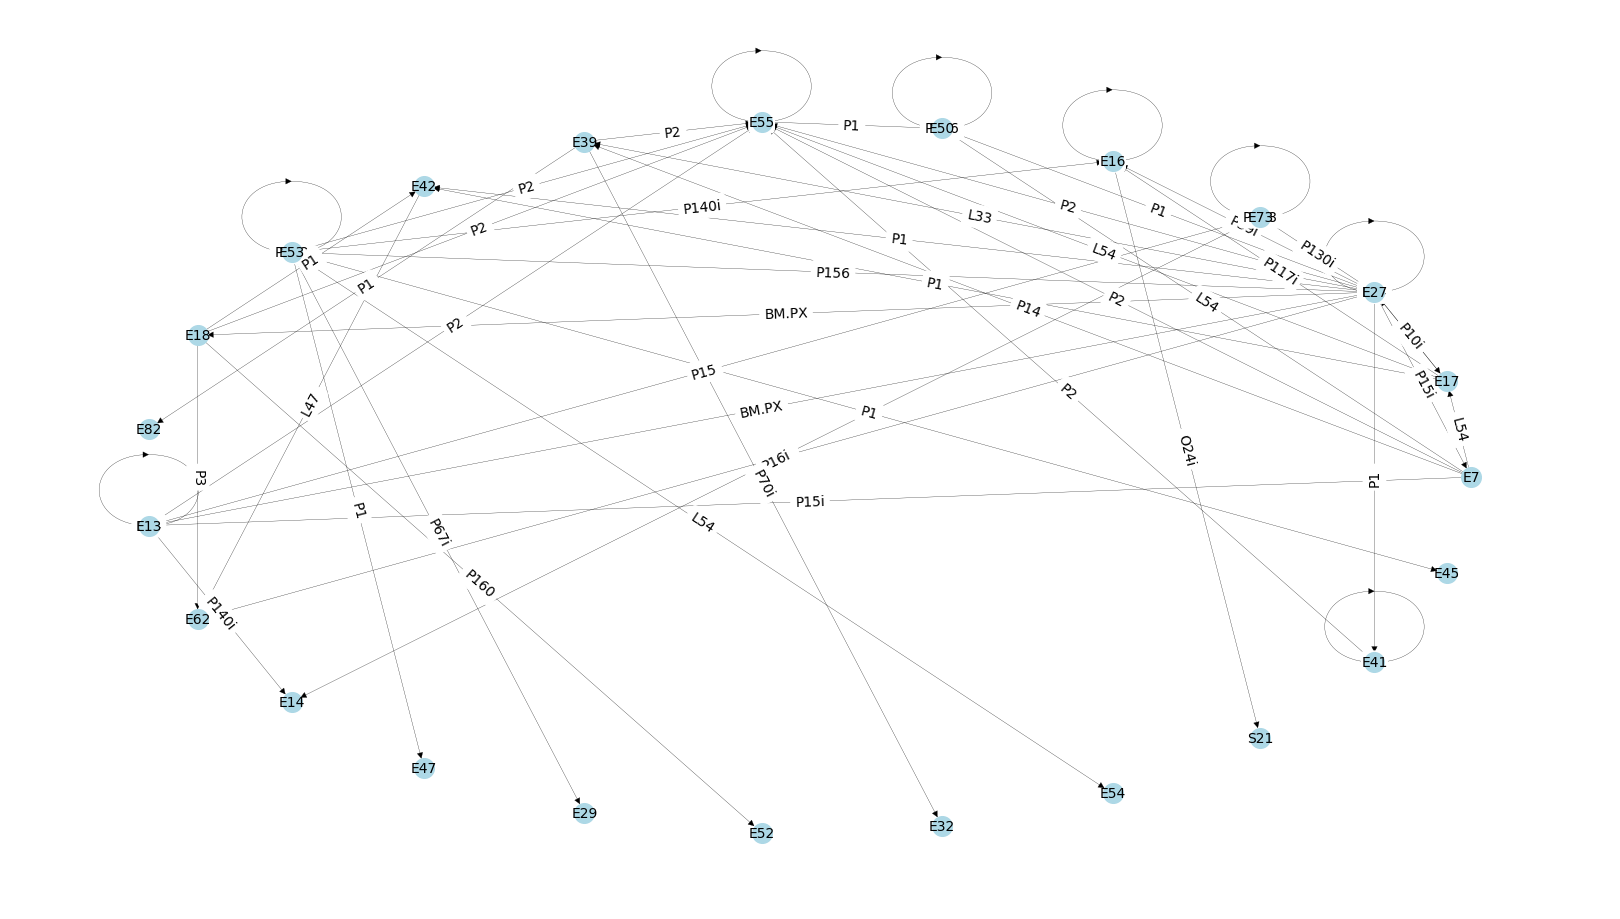

MAHS


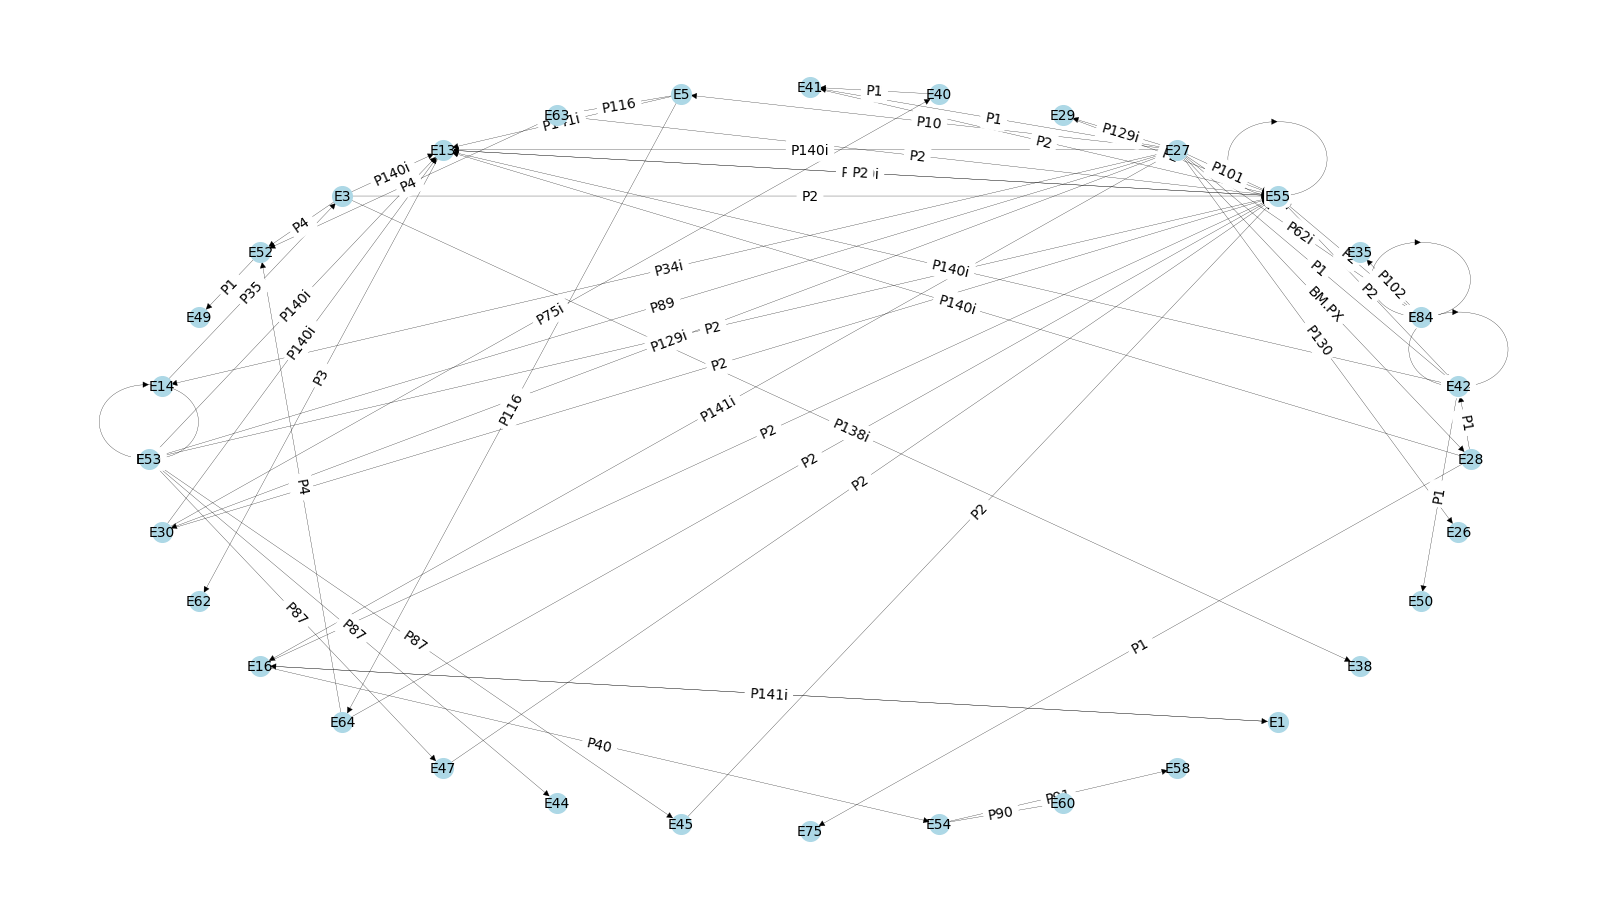

both


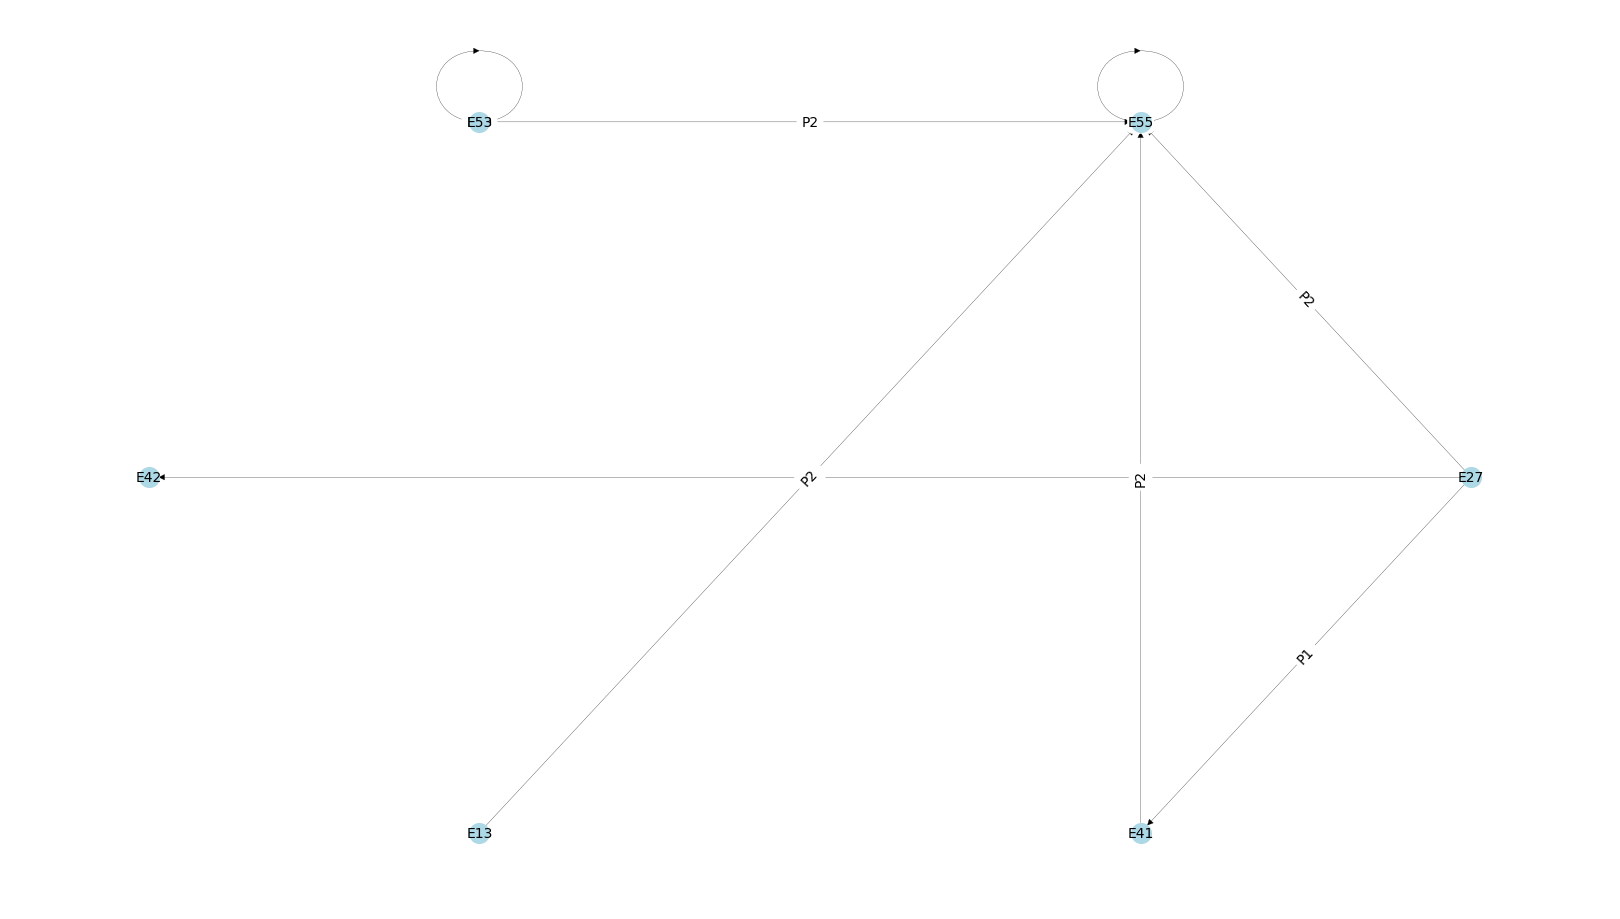

In [30]:
gm.plot_all_G(subgraph_metrics, comparison_metrics)

#### Combined graphs

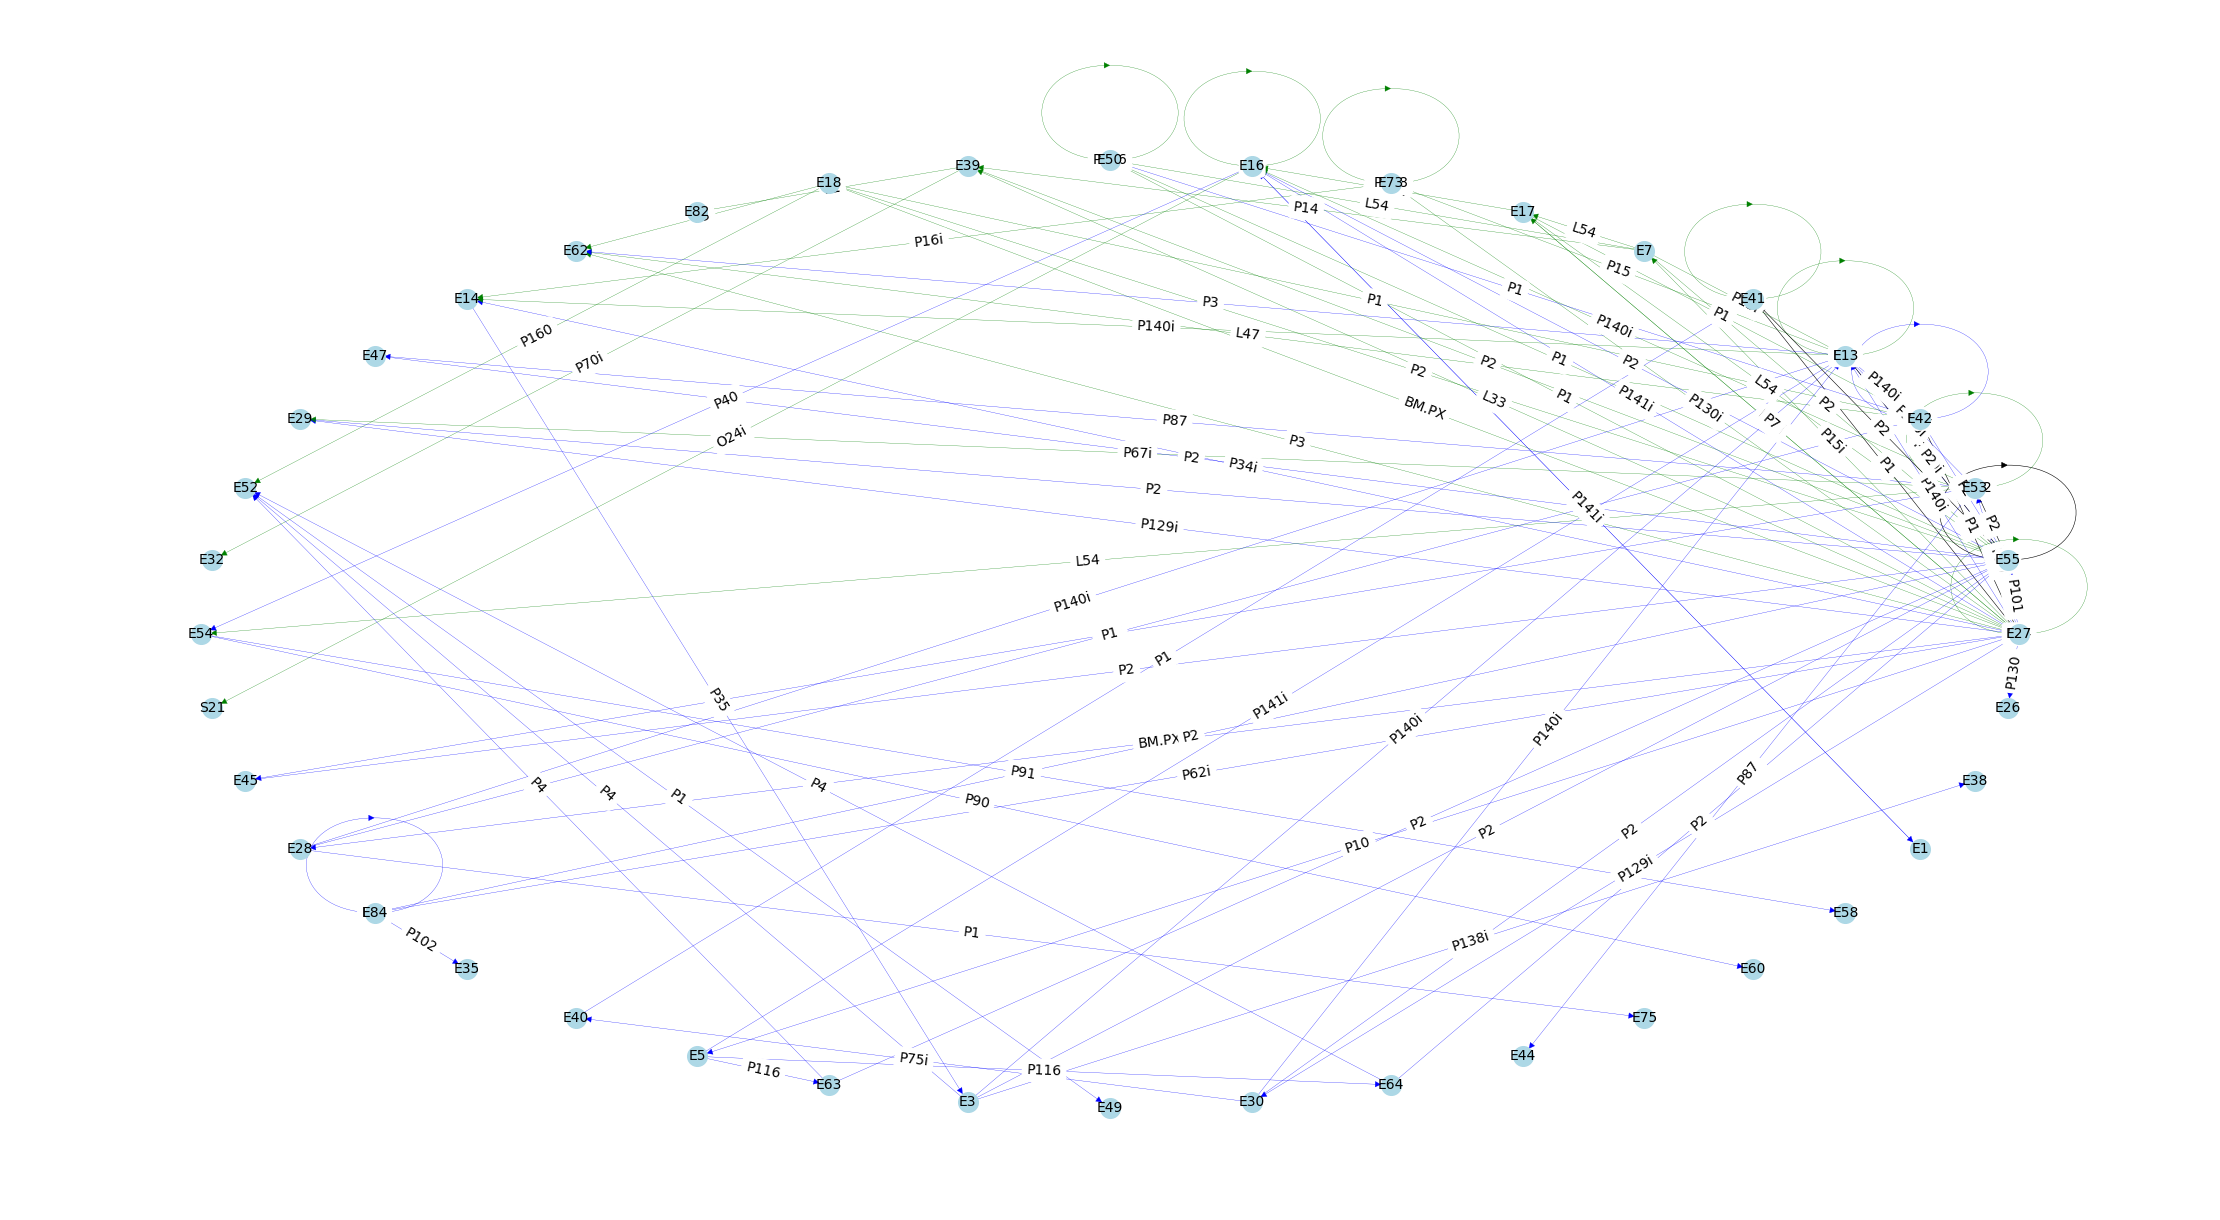

In [15]:
G = gm.all_nx_G(subgraph_metrics, comparison_metrics)
gm.plot_all_nx_G(G)

## Semantic web
<font color='darkgrey'>"The semantic web is the future of the internet and always will be"<br> &emsp; -- Peter Norvig, Director of Research at Google

### RDF

In [18]:
!ls /content/cultural-heritage/graph-parser/inputResourceModels/

MAEASAM_Site.json  MAHS_Site.json


In [20]:
# !python graph_comparator.py -ns "http://eamena#" -ns "http://maphsa#" "EAMENA Heritage Place.json" "MAPHSA Heritage Item.json"
!python /content/cultural-heritage/graph-parser/graph_comparator.py -ns "http://maeasam#" -ns "http://mahs#" "inputResourceModels/MAEASAM_Site.json" "inputResourceModels/MAHS_Site.json"

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
  xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
  xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
  xmlns:owl="http://www.w3.org/2002/07/owl#"
  xmlns:dc="http://purl.org/dc/elements/1.1/"
>
  <owl:ObjectProperty rdf:about="http://www.cidoc-crm.org/cidoc-crm/P39_measured">
    <rdfs:domain rdf:resource="http://mahs#5b144b0d-fc19-11ec-9eef-0050568e7db6"/>
    <rdfs:range rdf:resource="http://mahs#5b144b4c-fc19-11ec-9eef-0050568e7db6"/>
  </owl:ObjectProperty>
  <owl:ObjectProperty rdf:about="http://www.cidoc-crm.org/cidoc-crm/P3_has_note">
    <rdfs:domain rdf:resource="http://maeasam#2af3883e-77e2-11ec-ba7b-fa163e7d893d"/>
    <rdfs:domain rdf:resource="http://maeasam#99417384-b8fa-11e6-84a5-026d961c88e6"/>
    <rdfs:domain rdf:resource="http://mahs#5b144b4a-fc19-11ec-9eef-0050568e7db6"/>
    <rdfs:domain rdf:resource="http://mahs#5b144b43-fc19-11ec-9eef-0050568e7db6"/>
    <rdfs:domain rdf:resource="http://mahs#5b144b16-fc19

### Triple store and SPARQL

example: Ariadne subjects (10 first)


```sparql
PREFIX aocat: <https://www.ariadne-infrastructure.eu/resource/ao/cat/1.1/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
select distinct ?as ?lab where {
  ?resource aocat:has_ARIADNE_subject ?as .
    ?as rdfs:label ?lab .
} limit 10
```

In [22]:
IFrame('https://graphdb.ariadne.d4science.org/sparql', width=1000, height=600)

## Perspectives

* Persistancy
* Bring closer cultural heritage data managers and researchers

## Projects funder


<img src = "https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/www/logo-arcadia.png" width = "200">